# Noter til undervisningen (Python dag 1)
Dette er mine noter (Claus) til undervisningen. Forhåbentligt kan i bruge dem, men i opfordres selvfølgelig at lave jeres egne.

In [2]:
#%pip install matplotlib
#%pip install opencv-python
print('Setup complete!')

Setup complete!


## Installationer
* Python 
* VsCode
* Git

### Udviklingsmiljøet
1. Åben Interpretor
1. Lav en script.py fil
1. Lav en notebook.ipynb fil
    * vælg et virtuelt environment
        * .venv

### Clone dagens kode

```
git clone https://github.com/ITAKEA/kode_fra_undervisning_e24.git
```

Dette repositories master branch skal du ikke skrive din egen kode i.    
Lav istedet en ny branch til hver undervisningsgang og lav din kode i den branch. 

## Modelering af komplekse systemer
* Plat / Krone
* Gpt4o

#### 1. Plat / Krone  (boolean)
Det **mest simple system** vi kan lave     
Reglerne for dette system er:    
    
* Hvis 'krone' så er det næste 'plat'    
* Hvis 'plat' er det næste 'krone'    

![](../../_static/img/boolean_datatype.jpg)

In [3]:
heads = True
print(heads)

True


In [4]:
heads = not heads
print(heads)

False


In [5]:
type(heads)

bool

**Branching**  if / else / elif

In [6]:
if heads:
    heads = False
else:
    heads = True

print(heads)

True


Gennemgå:    
    
* if / else
    * bool check
* not
* indentering
* scope
* build in functions
    * print()
    * type()


### En talrække (int)
et **lidt mere komplekst system**    

Reglerne for dette system er: 

* Vi har et heltal
* vi kan bruge +, -, *, / 

![](../../_static/img/int_datatype.jpg)

In [7]:
num = 10
print(num)
num = num + 2
print(num)
num = num * 4
print(num)
type(num)

10
12
48


int

### Underdeling af tallene (float)
Systemet er smule mere komplekst

![](../../_static/img/float_datatype.jpg)

In [8]:
num = num / 5
print(num)
type(num)

9.6


float

In [9]:
num = int(num) # convert
print(num)
type(num)


9


int

Gennegå:    

* Build in functions
    * int()
    * bool()
    * float()
    * print()
    * input()
    * type()

### Beskrivende tekst (str)

In [10]:
name = 'Claus'
print('Hej med dig ' + name)

Hej med dig Claus


#### Øvelse: plat eller krone med brugerinput
Brug datatyper, build in functions, if/else til at løse opgaven.

In [11]:
x = bool(int(input('Plat (0) eller Krone (1)? : ')))
print(f'Du valgte {x}')
y = input('Vil du gå videre? (y/n): ')
if y == 'y':
    x = not x
print(f'Du har valgt at slutte med {x}')


Du valgte False
Du har valgt at slutte med False


## Et mere komplekst program (sequence types)
Hvis vi feks. gerne vil tegne en prik på en skærm, eller en rød firkant på et billede, eller som her en vektor i et koordinatsystem, har vi et klart mere komplekst system, og vi har brug for en datastuktur der kan indeholde flere værdier en bare en ad gangen. Til det vil vi matematisk set bruge en vektor, i en programmeringsmæssig sammenhæng vil det være repræsenteret af:     

* Lister
* Tupler

![](../../_static/img/vector1.jpg)

In [12]:
vector = [2,3]
type(vector)

list

In [13]:
vector = (2, 3, 5)
type(vector)

tuple

**index**

In [14]:
print(vector[0])
print(vector[1])

2
3


In [15]:
print(vector[-1])

5


**slicing**

In [16]:
vector[0:3]

(2, 3, 5)

**unpacking**

In [17]:
x,y,z = vector
(x,y,z)

(2, 3, 5)

**len()**

In [18]:
len(vector)

3

**loops**

In [19]:
for i in vector:
    print(i) # udføre en handling (bruge en function (handling))

2
3
5


#### Tegn en vector

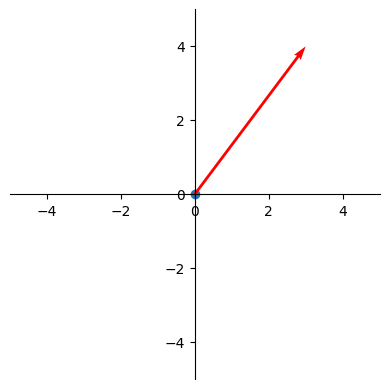

In [20]:
from vector_drawing import draw_vector
draw_vector([3,4])

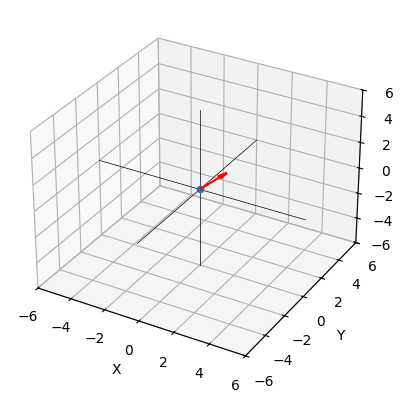

In [21]:
from vector_drawing import draw_3d_vector

draw_3d_vector([1, 1, 1])

## Functions

Udfør en handling = kald en function

Eksempler: 

* plus 2 vectorer sammen
    * feks. et bolds position beskrevet vha af en vektor. 
    * tyngdekraften beskrevet ved en vektor
    * plus sammen giver det nye punkt hvor bolden befinder sig.
    * feks. en bold i frit fald

Genemgå:

* **f()** har navnet **f** og eksekveres af **()**

**Liniers ligning**

``` 
    f(x) = ax + b   
    
    eller:    
    
    y = ax + b
```

In [22]:
a = 5 # hældning
b = 2 # y - skæringspunkt

def f(x):
    return a*x + b

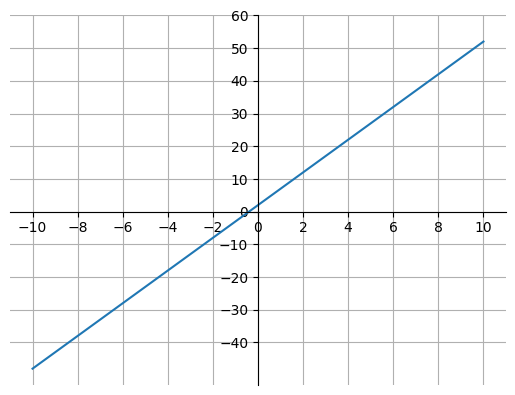

In [23]:
from vector_drawing import draw_line
draw_line(f) # variablenavnet f (fra f())

#### + 2 vectorer

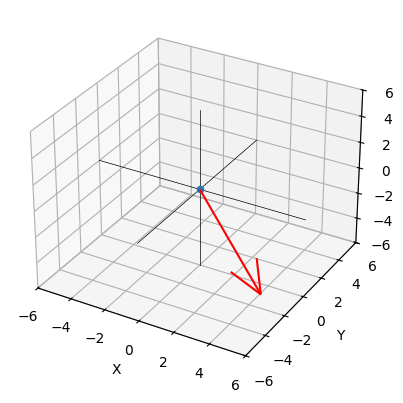

In [36]:
def add(v1, v2):
    return v1[0]+v2[0], v1[1]+v2[1], v1[2]+v2[2]

v1 = [0,0,-9.8] # tyngdekraften
v2 = [2,3,0]
v3 = add(v1, v2)

draw_3d_vector(v3)

## Billedebehandling med python og vektorer

Forestil jer at vi har et billede der ser sådan ud.     
Billedet er her forstørret mange gange.     
Hver firkant er en pixel, så dette billede består altså af 9 pixels.
![](../../_static/img/check_pattern_3_3.png)

Vi kan læse dette billede ind i en liste hvor den hvide farve giver os et tal 255, og den sorte et 0. Det giver os en liste der ser sådan ud:    

```
[[255, 0, 255], [0, 255, 0], [255, 0, 255]]
```

Så det er altså en liste indeholdende 3 lister.

### Andre billeder kunne være: 

<img src='../../_static/img/vector1.jpg' width=10%>

**vecor1.jpg** indeholder 3022 x 2662 pixels, dets Color space er 'RGB'

**tiny_checkerboard.png** indeholder 3 x 3 pixels, dets Color Space er 'Gray'

In [4]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('../../_static/img/tiny_checkerboard.png')

# Step 3: Flatten the image to create a vector
image_vector = img.flatten()

mod = [i if i == 255 else 150 for i in list(image_vector)]

In [5]:
image_vector

array([255, 255, 255,   0,   0,   0, 255, 255, 255,   0,   0,   0, 255,
       255, 255,   0,   0,   0, 255, 255, 255,   0,   0,   0, 255, 255,
       255], dtype=uint8)

In [17]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('../../_static/img/tiny_checkerboard.png')

# Step 3: Flatten the image to create a vector
image_vector = img.flatten()

# Modify the vector
mod = [i if i == 255 else 150 for i in image_vector]

# Ensure the modified list is a numpy array
mod_array = np.array(mod, dtype=np.uint8)

# Reshape the modified array back to the original image shape
original_shape = img.shape
mod_image = mod_array.reshape(original_shape)

# Save the new image
cv2.imwrite('modified_image.png', mod_image)

# Optionally, display the image using OpenCV (for validation)
cv2.imshow('Modified Image', mod_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Opsummering

**Datatyper:**   

* bool
* int
* float

**Sequence typer:**    

* str
* list
* tuple

Jo mere kompleks et system (program) er, jo mere komplekse datatyper har man ofte brug for.    

Sequence types har det til fælles at de har et **index**.    
De kan **slices**.    
Den har en **længde (len())**.    
Og man kan **iterere** over dem (loop).

**Funktioner:**      

<u>Funktioner udfører handlinger.</u>

* add()

Build in functions:

* print()
* input()
* int()
* float()
* bool()
* type()
* len()

**branching**    

* if/else

**loops**

* for i in vector: